# Mental Health Analysis Project

## Aim:
**Build a predictive model to identify factors associated with frequent mental distress among older adults.**

## Question:
**What factors are associated with frequent mental distress among older adults?**

## Objectives:
1. **Identify key demographic and health-related predictors of mental distress.**
2. **Build and validate a predictive model.**
3. **Interpret the results and provide actionable insights.**

## Potential Analyses:

### 1. Identify Demographic Groups Most Affected by Frequent Mental Distress:
   - **Age Groups**: The analysis will examine which age ranges (e.g., 50-64 years, 65+ years) report higher levels of frequent mental distress.
   - **Race**: The impact of racial/ethnic backgrounds on mental distress will be analyzed.
   - **Gender**: The prevalence of mental distress between male and female older adults will be compared.

### 2. Explore Geographic Variations in Mental Distress Percentages:
   - **State-Level Analysis**: States with higher and lower percentages of older adults experiencing frequent mental distress will be identified.
   - **Urban vs. Rural**: Differences in mental distress rates between urban and rural areas will be investigated.

### 3. Analyze Correlations Between Mental Distress and Other Health Indicators:
   - **Physical Activity Limitations**: The relationship between physical activity limitations and mental distress will be studied.
   - **Self-Rated Health**: How self-rated health status correlates with mental distress will be explored.
   - **Other Health Factors**: Additional health indicators, such as chronic conditions, disability status, and access to healthcare, will be considered.

## Steps:

### 1. Data Preparation:
   - **Cleaning**: Missing values and outliers will be handled.
   - **Feature Engineering**: New features will be created based on existing data (e.g., age groups, interaction terms).
   - **Normalization**: Data will be standardized or normalized to ensure consistency.

### 2. Exploratory Data Analysis (EDA):
   - **Descriptive Statistics**: Mean, median, and standard deviation will be calculated.
   - **Visualizations**: Histograms, bar plots, and scatter plots will be created to identify patterns and relationships.
   - **Correlation Analysis**: Correlations between variables will be identified using heatmaps and correlation coefficients.

### 3. Model Building:
   - **Splitting the Data**: The dataset will be split into training and testing sets.
   - **Model Selection**: Appropriate models (e.g., logistic regression, decision trees, random forest) will be chosen.
   - **Hyperparameter Tuning**: Model parameters will be optimized using techniques like grid search or random search.

### 4. Model Validation:
   - **Performance Metrics**: Model performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score.
   - **Cross-Validation**: Cross-validation techniques will be used to ensure model generalizability.

### 5. Interpretation & Reporting:
   - **Feature Importance**: The most important features influencing mental distress will be identified and interpreted.
   - **Actionable Insights**: Recommendations based on model findings will be provided.
   - **Report**: A comprehensive report documenting the methodology, results, and conclusions will be compiled.

## Data Source:
**The data for this project will be sourced from the Alzheimer’s Disease and Healthy Aging Data dataset.**

## Tools & Technologies:
- **Programming Languages**: Python (pandas, numpy, scikit-learn)
- **Visualization Libraries**: Matplotlib, Seaborn
- **Machine Learning Libraries**: Scikit-learn, XGBoost


# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib as mp

In [2]:
data = pd.read_csv("cleaned_alzh_data.csv")

In [3]:
data.head()

YearStart  YearEnd         State           Class  \
0       2022     2022      Maryland   Mental Health   
1       2022     2022     Wisconsin   Mental Health   
2       2022     2022      Oklahoma   Mental Health   
3       2022     2022  Pennsylvania   Mental Health   
4       2022     2022       Arizona  Overall Health   

                                       Topic  \
0                   Frequent mental distress   
1                   Frequent mental distress   
2                   Frequent mental distress   
3                   Frequent mental distress   
4  Recent activity limitations in past month   

                                            Question Data_Value_Type  \
0  Percentage of older adults who are experiencin...      Percentage   
1  Percentage of older adults who are experiencin...      Percentage   
2  Percentage of older adults who are experiencin...      Percentage   
3  Percentage of older adults who are experiencin...      Percentage   
4  Mean number of days with activity limitations ...            Mean   

   Data_Value  Low_Confidence_Limit  High_Confidence_Limit          Age_group  \
0         9.0                   6.5                   12.3  65 years or older   
1         5.6                   4.4                    7.2  65 years or older   
2        21.5                  15.4                   29.2            Overall   
3        10.0                   8.3                   12.1            Overall   
4         6.1                   5.4                    6.7  65 years or older   

            Stratification2 StratificationCategoryID2  
0       Black, non-Hispanic                      RACE  
1                      Male                    GENDER  
2  Native Am/Alaskan Native                      RACE  
3       White, non-Hispanic                      RACE  
4       White, non-Hispanic                      RACE

In [4]:
data['Age_group'] = data['Age_group'].replace({
    '50-64 years': '50-64',
    '65 years or older': '65+'
})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126115 entries, 0 to 126114
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  126115 non-null  int64  
 1   YearEnd                    126115 non-null  int64  
 2   State                      126115 non-null  object 
 3   Class                      126115 non-null  object 
 4   Topic                      126115 non-null  object 
 5   Question                   126115 non-null  object 
 6   Data_Value_Type            126115 non-null  object 
 7   Data_Value                 126115 non-null  float64
 8   Low_Confidence_Limit       126115 non-null  float64
 9   High_Confidence_Limit      126115 non-null  float64
 10  Age_group                  126115 non-null  object 
 11  Stratification2            126115 non-null  object 
 12  StratificationCategoryID2  126115 non-null  object 
dtypes: float64(3), int64(2), obje

In [6]:
# the distribution of categorical variables
categorical_columns = ['State', 'Class', 'Topic', 'Data_Value_Type', 'Age_group', 'Stratification2']
for column in categorical_columns:
    print(f"Distribution of {column}:")
    print(data[column].value_counts())
    print("\n")   

Distribution of State:
New York                3701
Maryland                3085
Texas                   3058
Hawaii                  3049
Washington              3002
Arizona                 2982
California              2955
New Mexico              2829
Oklahoma                2825
Connecticut             2752
Ohio                    2746
Georgia                 2739
Minnesota               2733
New Jersey              2730
Kansas                  2721
Virginia                2720
Florida                 2617
Michigan                2599
Colorado                2566
Nebraska                2560
Indiana                 2555
North Carolina          2552
South Carolina          2517
Illinois                2512
Mississippi             2454
Utah                    2452
Oregon                  2410
Alabama                 2404
Massachusetts           2394
Pennsylvania            2382
Louisiana               2374
Delaware                2333
Missouri                2312
Wisconsin           

In [7]:
# the dataframe for rows where 'Class' is either 'Mental Health' or 'Cognitive Decline'
filtered_df = data[data['Class'].isin(['Mental Health', 'Cognitive Decline'])]

# unique values of 'Topic' from the filtered dataframe
unique_topics = filtered_df['Topic'].unique()

unique_topics

array(['Frequent mental distress', 'Lifetime diagnosis of depression',
       'Talked with health care professional about subjective cognitive decline or memory loss',
       'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
       'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
       'Subjective cognitive decline or memory loss among older adults'],
      dtype=object)

Although there are several topics related to mental health, I have chosen to focus only on 'Frequent mental distress' for further analysis. Data for all other topics will be excluded.

In [8]:
# List of topics to be eliminated
topics_to_eliminate = [
    'Lifetime diagnosis of depression',
    'Talked with health care professional about subjective cognitive decline or memory loss',
    'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
    'Subjective cognitive decline or memory loss among older adults'
]

# Filter the DataFrame to exclude these topics
df = data[~data['Topic'].isin(topics_to_eliminate)]

In [9]:
df.head(2)

YearStart  YearEnd      State          Class                     Topic  \
0       2022     2022   Maryland  Mental Health  Frequent mental distress   
1       2022     2022  Wisconsin  Mental Health  Frequent mental distress   

                                            Question Data_Value_Type  \
0  Percentage of older adults who are experiencin...      Percentage   
1  Percentage of older adults who are experiencin...      Percentage   

   Data_Value  Low_Confidence_Limit  High_Confidence_Limit Age_group  \
0         9.0                   6.5                   12.3       65+   
1         5.6                   4.4                    7.2       65+   

       Stratification2 StratificationCategoryID2  
0  Black, non-Hispanic                      RACE  
1                 Male                    GENDER

In [10]:
df = df.drop(columns = ['Class', 'Question'])

In [11]:
df.head(50)

YearStart  YearEnd                 State  \
0        2022     2022              Maryland   
1        2022     2022             Wisconsin   
2        2022     2022              Oklahoma   
3        2022     2022          Pennsylvania   
4        2022     2022               Arizona   
5        2022     2022                  Ohio   
6        2022     2022               Georgia   
7        2022     2022                 Idaho   
8        2022     2022              Colorado   
9        2022     2022          Pennsylvania   
10       2022     2022              Arkansas   
11       2022     2022              Maryland   
12       2022     2022              New York   
13       2022     2022               Arizona   
14       2022     2022          South Dakota   
15       2022     2022              Maryland   
16       2022     2022               Georgia   
17       2022     2022                Kansas   
18       2022     2022            Washington   
19       2022     2022            Washington   
20       2022     2022               Vermont   
21       2022     2022                Hawaii   
22       2022     2022  District of Columbia   
23       2022     2022              Colorado   
24       2022     2022                Hawaii   
25       2022     2022              New York   
26       2022     2022              Maryland   
27       2022     2022                Alaska   
28       2022     2022              New York   
29       2022     2022             Wisconsin   
30       2022     2022            Washington   
31       2022     2022                Hawaii   
32       2022     2022                Hawaii   
33       2022     2022               Montana   
34       2022     2022             Wisconsin   
35       2022     2022            New Mexico   
36       2022     2022               Alabama   
37       2022     2022            Washington   
38       2022     2022            New Mexico   
39       2022     2022                  Utah   
40       2022     2022               Arizona   
41       2022     2022                Hawaii   
42       2022     2022             Tennessee   
43       2022     2022                 Idaho   
44       2022     2022                 Texas   
45       2022     2022         West Virginia   
46       2022     2022             Wisconsin   
47       2022     2022               Montana   
48       2022     2022            Washington   
49       2022     2022          Rhode Island   

                                                Topic Data_Value_Type  \
0                            Frequent mental distress      Percentage   
1                            Frequent mental distress      Percentage   
2                            Frequent mental distress      Percentage   
3                            Frequent mental distress      Percentage   
4           Recent activity limitations in past month            Mean   
5   Expect to provide care for someone in the next...      Percentage   
6        Self-rated health (good to excellent health)      Percentage   
7                        Arthritis among older adults      Percentage   
8           Recent activity limitations in past month            Mean   
9   Disability status, including sensory or mobili...      Percentage   
10  Disability status, including sensory or mobili...      Percentage   
11                      Oral health:  tooth retention      Percentage   
12                      Oral health:  tooth retention      Percentage   
13                      Oral health:  tooth retention      Percentage   
14                      Oral health:  tooth retention      Percentage   
15                     Prevalence of sufficient sleep      Percentage   
16            Self-rated health (fair to poor health)      Percentage   
17                      Ever had pneumococcal vaccine      Percentage   
18                      Ever had pneumococcal vaccine      Percentage   
19                      Ever had pneumococcal vaccine      Percentage   
20                    

In [12]:
df['Topic'].unique()

array(['Frequent mental distress',
       'Recent activity limitations in past month',
       'Expect to provide care for someone in the next two years',
       'Self-rated health (good to excellent health)',
       'Arthritis among older adults',
       'Disability status, including sensory or mobility limitations',
       'Oral health:  tooth retention', 'Prevalence of sufficient sleep',
       'Self-rated health (fair to poor health)',
       'Ever had pneumococcal vaccine',
       'Up-to-date with recommended vaccines and screenings - Men',
       'Up-to-date with recommended vaccines and screenings - Women',
       'Mammogram within past 2 years', 'Pap test within past 3 years',
       'Obesity', 'No leisure-time physical activity within past month',
       'Current smoking', 'Influenza vaccine within past year',
       'Diabetes screening within past 3 years',
       'Fair or poor health among older adults with arthritis',
       'Binge drinking within past 30 days',
       'Prov

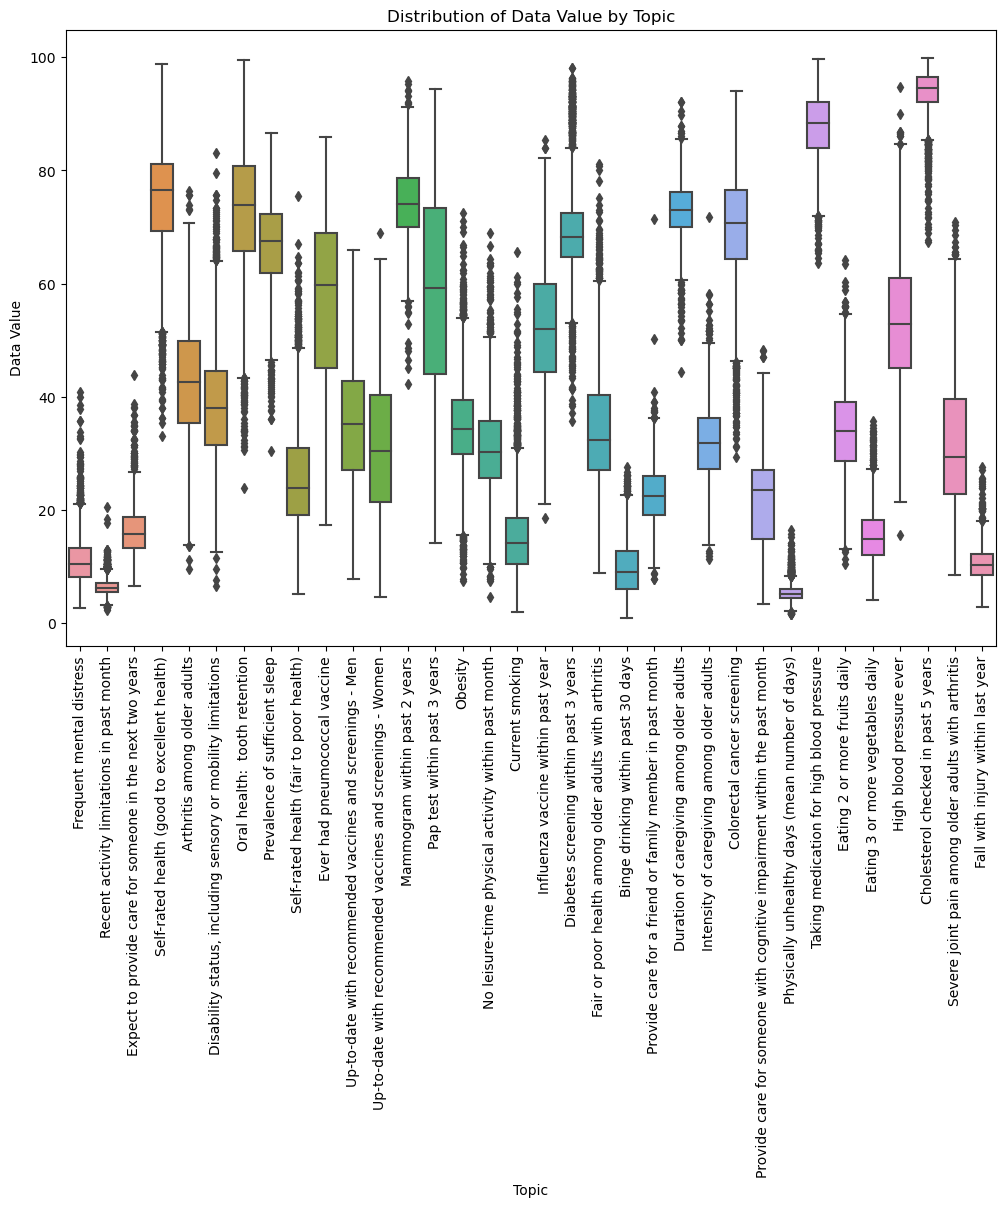

In [13]:
# The distribution of Data_Value by Topic
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Topic', y='Data_Value')
plt.xticks(rotation=90)
plt.title('Distribution of Data Value by Topic')
plt.xlabel('Topic')
plt.ylabel('Data Value')
plt.show()

In [14]:
# Group by State and Topic and calculate the mean Data_Value
state_topic_summary = df.groupby(['State', 'Topic'])['Data_Value'].mean().reset_index()

# Display the summary
state_topic_summary

State                                              Topic  Data_Value
0     Alabama                       Arthritis among older adults   53.444000
1     Alabama                 Binge drinking within past 30 days    7.335556
2     Alabama                Cholesterol checked in past 5 years   94.890196
3     Alabama                        Colorectal cancer screening   73.518750
4     Alabama                                    Current smoking   16.566667
...       ...                                                ...         ...
1726  Wyoming       Self-rated health (good to excellent health)   78.197727
1727  Wyoming  Severe joint pain among older adults with arth...   22.627778
1728  Wyoming          Taking medication for high blood pressure   84.905263
1729  Wyoming  Up-to-date with recommended vaccines and scree...   31.535294
1730  Wyoming  Up-to-date with recommended vaccines and scree...   26.070588

[1731 rows x 3 columns]

In [15]:
pivot_df = df.pivot_table(index='State', columns='Topic', values='Data_Value', aggfunc='mean')

# Display the pivot table
print(pivot_df)

Topic                 Arthritis among older adults  \
State                                                
Alabama                                  53.444000   
Alaska                                   41.016883   
Arizona                                  38.972072   
Arkansas                                 49.610390   
California                               36.309091   
Colorado                                 40.375269   
Connecticut                              38.590426   
Delaware                                 41.384146   
District of Columbia                     37.078082   
Florida                                  41.522222   
Georgia                                  41.628049   
Hawaii                                   35.367778   
Idaho                                    40.133824   
Illinois                                 41.266667   
Indiana                                  44.341860   
Iowa                                     39.915278   
Kansas                      

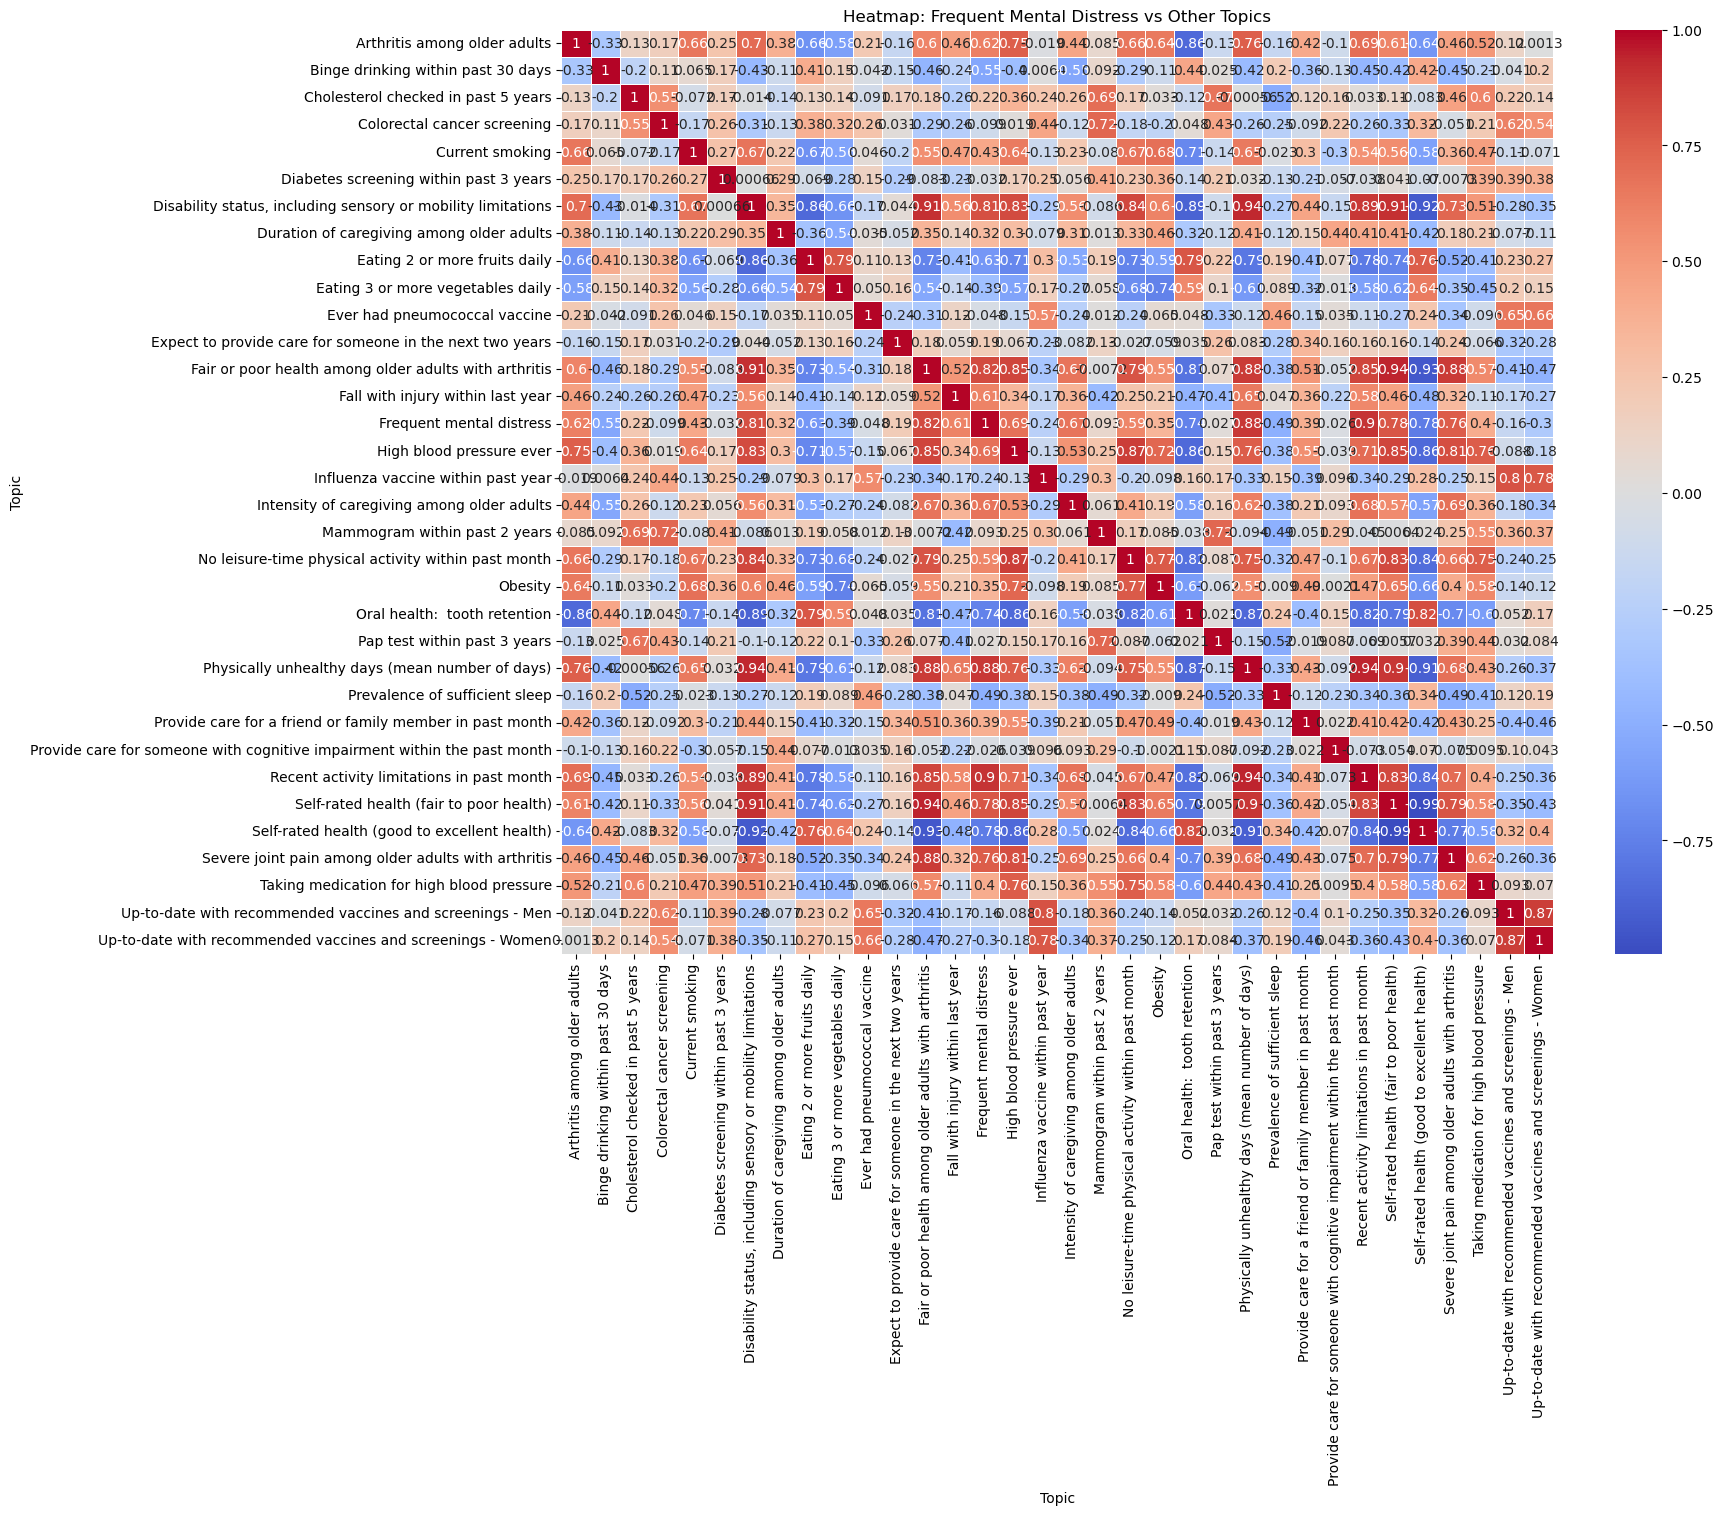

In [16]:
# Heatmap for "Frequent mental distress" vs all other topics
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap: Frequent Mental Distress vs Other Topics')
plt.xticks(rotation=90)
plt.show()

In [17]:
mental_df = df[df['Topic']=='Frequent mental distress']
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778 entries, 0 to 126101
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  4778 non-null   int64  
 1   YearEnd                    4778 non-null   int64  
 2   State                      4778 non-null   object 
 3   Topic                      4778 non-null   object 
 4   Data_Value_Type            4778 non-null   object 
 5   Data_Value                 4778 non-null   float64
 6   Low_Confidence_Limit       4778 non-null   float64
 7   High_Confidence_Limit      4778 non-null   float64
 8   Age_group                  4778 non-null   object 
 9   Stratification2            4778 non-null   object 
 10  StratificationCategoryID2  4778 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 447.9+ KB


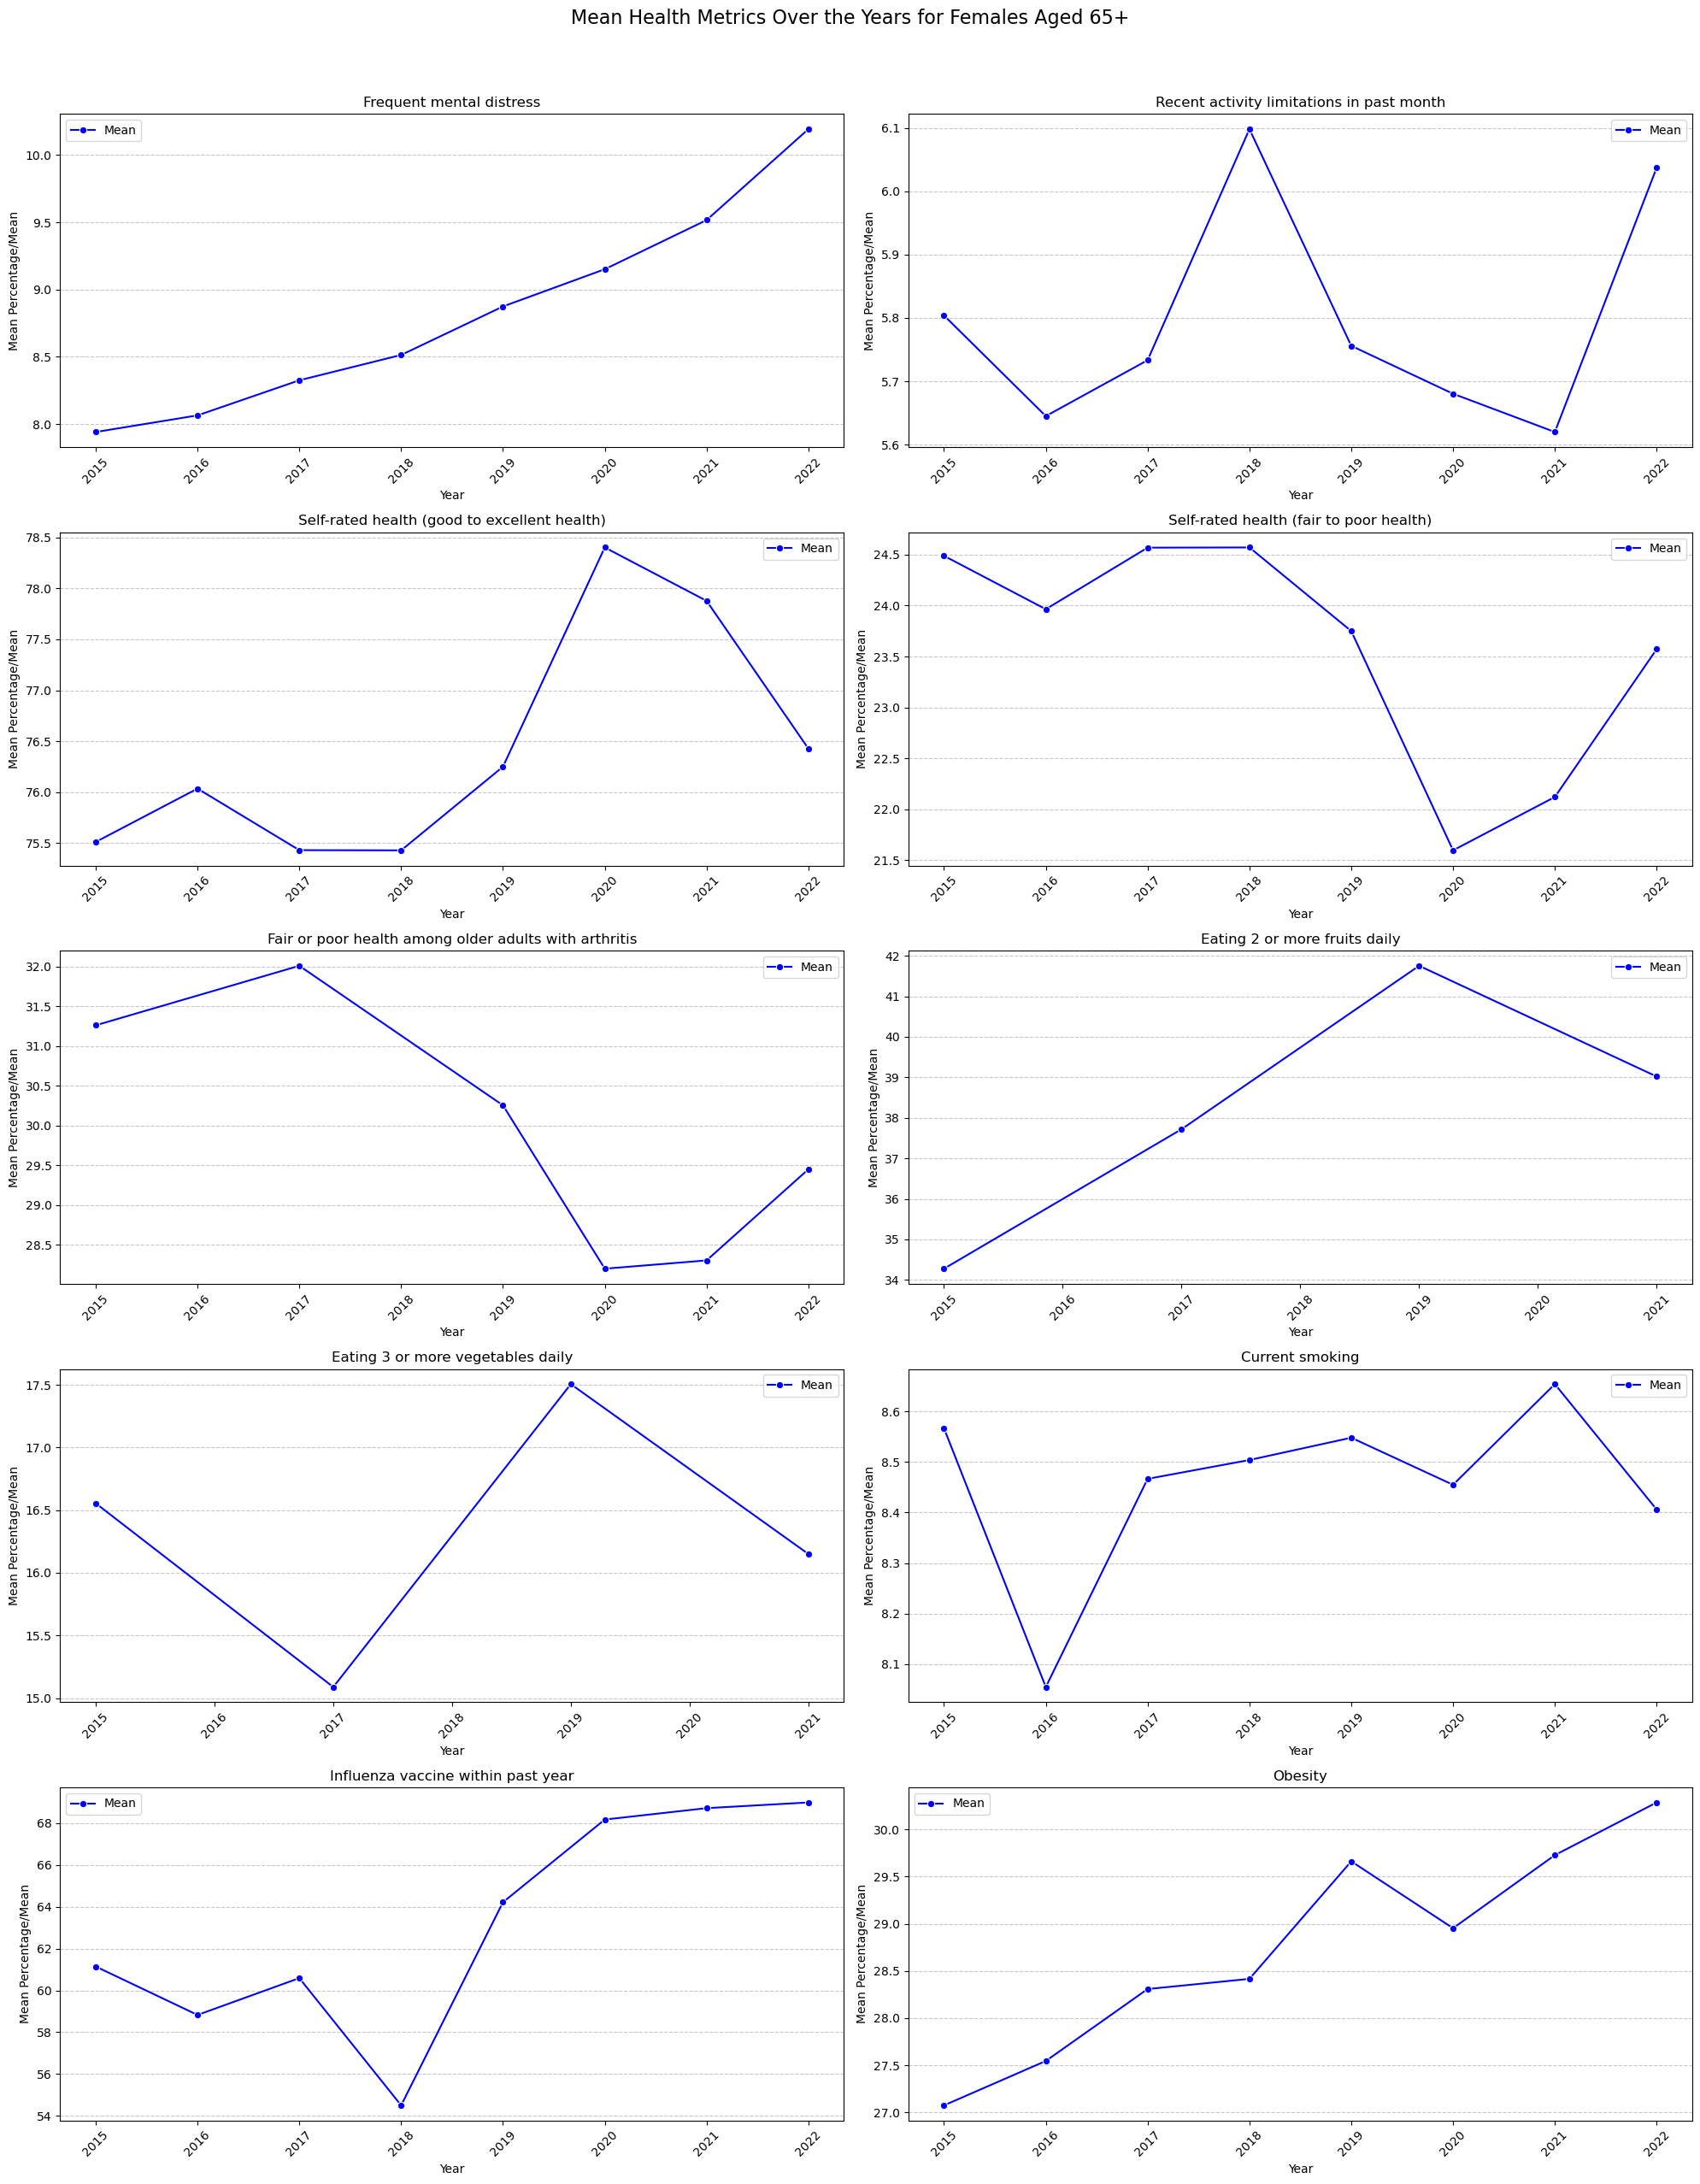

In [18]:
# Filter the data for Age_group = '65 years or older' and Stratification2 = 'Female'
filtered_data = df[(df['Age_group'] == '65+') & (df['Stratification2'] == 'Female')]

# List of topics to plot
topics = [
    'Frequent mental distress',
    'Recent activity limitations in past month',
    'Self-rated health (good to excellent health)',
    'Self-rated health (fair to poor health)',
    'Fair or poor health among older adults with arthritis',
    'Eating 2 or more fruits daily',
    'Eating 3 or more vegetables daily',
    'Current smoking',
    'Influenza vaccine within past year',
    'Obesity'
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Mean Health Metrics Over the Years for Females Aged 65+', fontsize=16, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each topic
for i, topic in enumerate(topics):
    # Filter data for the current topic
    topic_data = filtered_data[filtered_data['Topic'] == topic]
    
    # Group by YearStart and calculate the mean of Data_Value
    yearly_mean = topic_data.groupby('YearStart')['Data_Value'].mean().reset_index()
    
    # Plot line plot for the mean over the years
    sns.lineplot(
        x='YearStart', 
        y='Data_Value', 
        data=yearly_mean, 
        ax=axes[i], 
        marker='o', 
        color='b', 
        label='Mean'
    )
    
    # Customize the plot
    axes[i].set_title(topic, fontsize=12)
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Mean Percentage/Mean', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Drop 'Topic' and 'Class' columns from mental_df
mental_df = mental_df.drop(columns=['Topic','Data_Value_Type'])

In [20]:
# Reset the index of mental_df
mental_df = mental_df.reset_index(drop=True)
mental_df.head(2)

YearStart  YearEnd      State  Data_Value  Low_Confidence_Limit  \
0       2022     2022   Maryland         9.0                   6.5   
1       2022     2022  Wisconsin         5.6                   4.4   

   High_Confidence_Limit Age_group      Stratification2  \
0                   12.3       65+  Black, non-Hispanic   
1                    7.2       65+                 Male   

  StratificationCategoryID2  
0                      RACE  
1                    GENDER

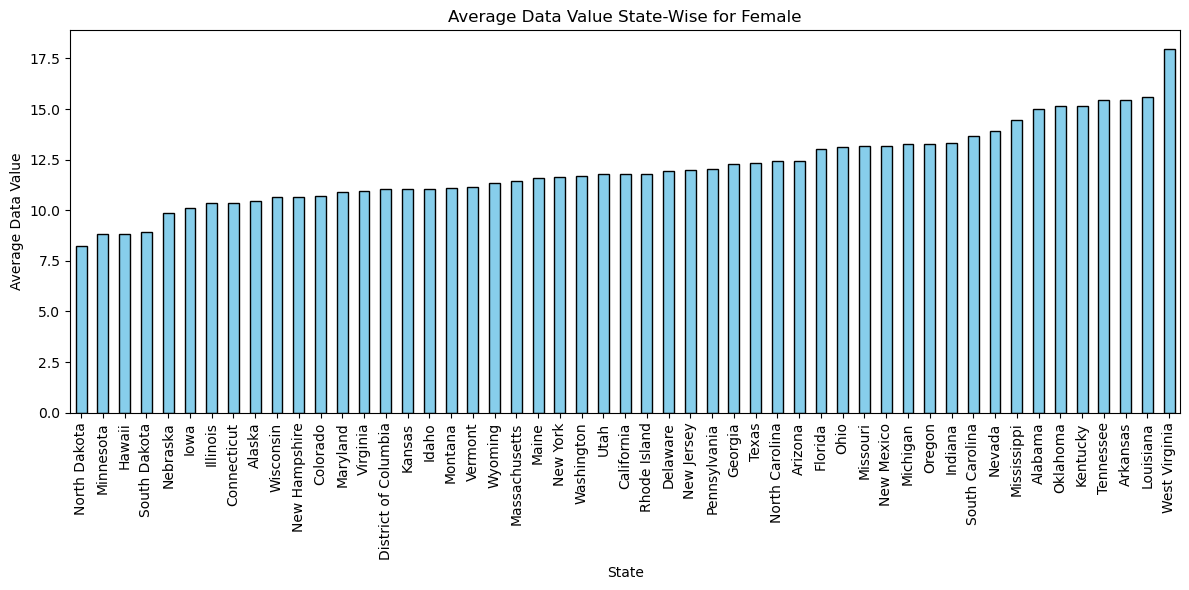

In [21]:
# Filter data for a specific stratification (e.g., 'Female')
stratification_filter = "Female"
filtered_data = mental_df[mental_df['Stratification2'] == stratification_filter]

# Group by state and calculate the mean Data_Value for each state
state_data = filtered_data.groupby('State')['Data_Value'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 6))
state_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Average Data Value State-Wise for {stratification_filter}")
plt.ylabel("Average Data Value")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


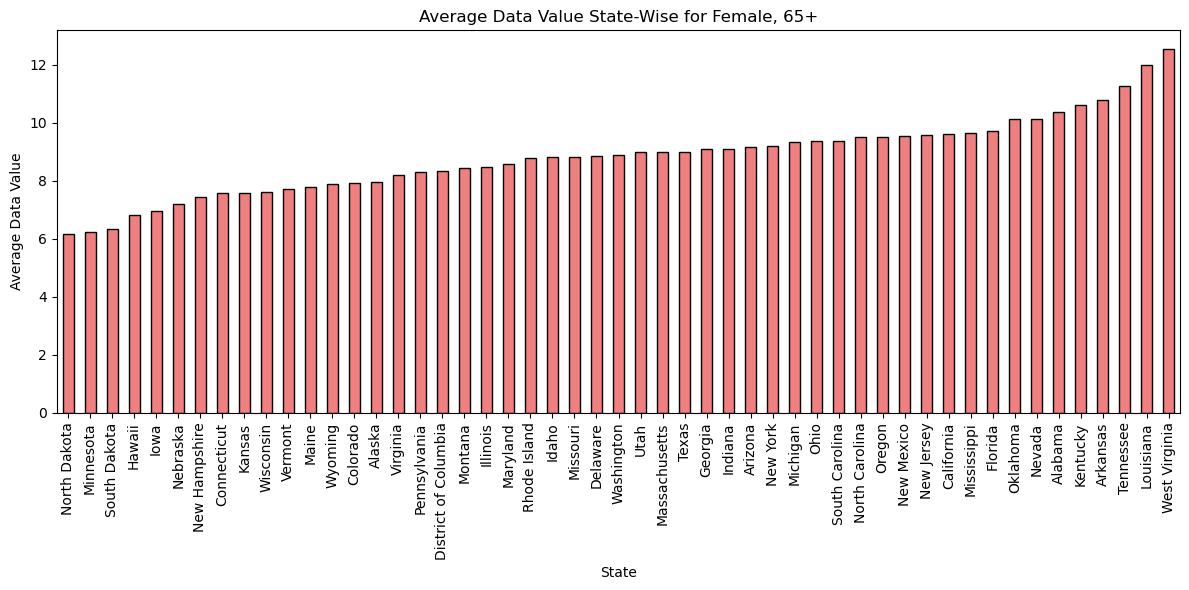

In [22]:
# Define the filters for Stratification2 and Age_group
stratification_filter = "Female"
age_group_filter = "65+"

# Filter the data based on the specified stratification and age group
filtered_data = mental_df[
    (mental_df['Stratification2'] == stratification_filter) &
    (mental_df['Age_group'] == age_group_filter)
]

# Group by state and calculate the mean Data_Value for each state
state_data = filtered_data.groupby('State')['Data_Value'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 6))
state_data.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title(f"Average Data Value State-Wise for {stratification_filter}, {age_group_filter}")
plt.ylabel("Average Data Value")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [23]:
value_counts = mental_df['Stratification2'].value_counts()
value_counts


White, non-Hispanic         1218
Female                      1218
Male                        1211
Black, non-Hispanic          588
Hispanic                     368
Native Am/Alaskan Native     140
Asian/Pacific Islander        35
Name: Stratification2, dtype: int64

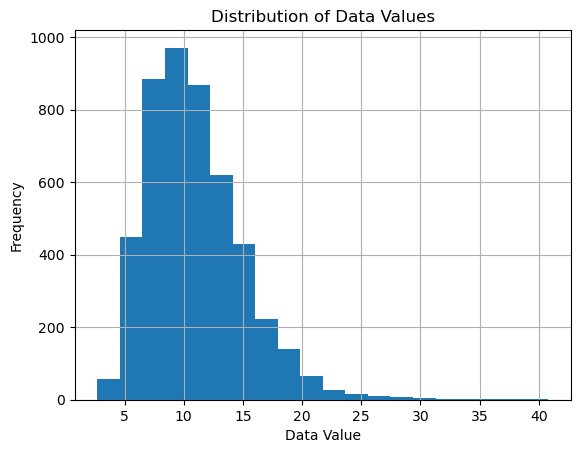

In [24]:
mental_df['Data_Value'].hist(bins=20)
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()


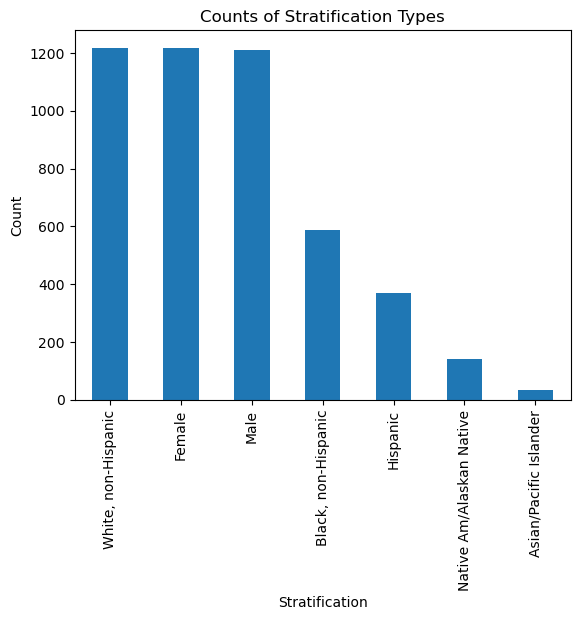

In [25]:
mental_df['Stratification2'].value_counts().plot(kind='bar')
plt.title('Counts of Stratification Types')
plt.xlabel('Stratification')
plt.ylabel('Count')
plt.show()

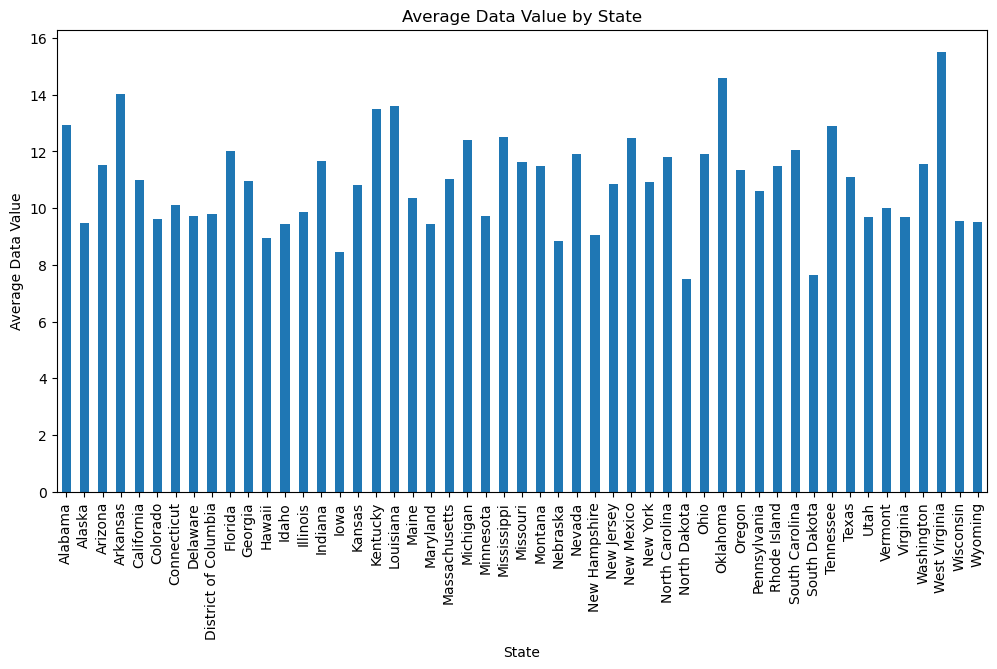

In [26]:
state_means = mental_df.groupby('State')['Data_Value'].mean()
state_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Data Value by State')
plt.ylabel('Average Data Value')
plt.xticks(rotation=90)
plt.show()

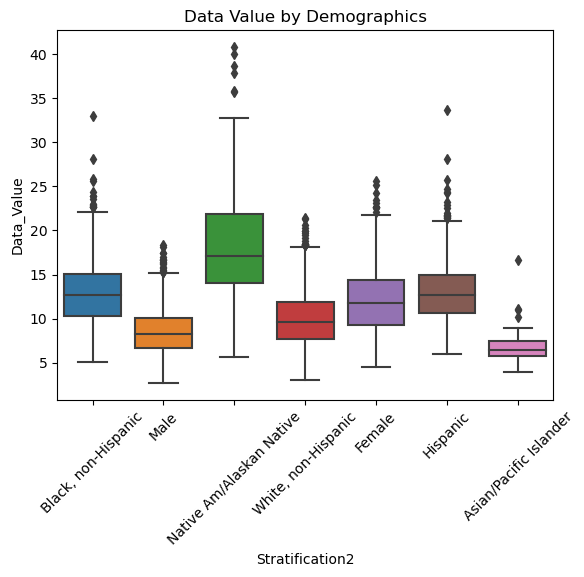

In [27]:
sns.boxplot(x='Stratification2', y='Data_Value', data=mental_df)
plt.title('Data Value by Demographics')
plt.xticks(rotation=45)
plt.show()

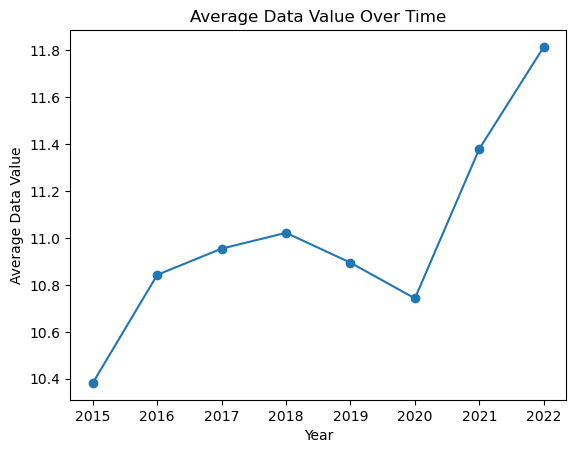

In [28]:
yearly_trends = mental_df.groupby('YearStart')['Data_Value'].mean()
yearly_trends.plot(marker='o')
plt.title('Average Data Value Over Time')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.show()

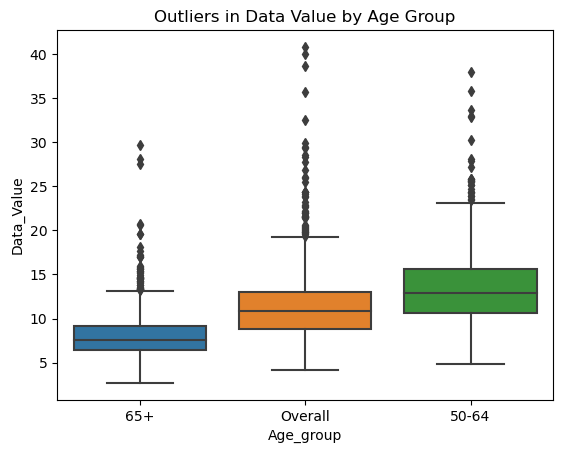

In [29]:
sns.boxplot(x='Age_group', y='Data_Value', data=mental_df)
plt.title('Outliers in Data Value by Age Group')
plt.show()


In [30]:
black_non_hispanic = mental_df[mental_df['Stratification2'] == 'Black, non-Hispanic']
black_non_hispanic['Data_Value'].describe()


count    588.000000
mean      12.959014
std        3.823357
min        5.100000
25%       10.275000
50%       12.700000
75%       15.100000
max       33.000000
Name: Data_Value, dtype: float64

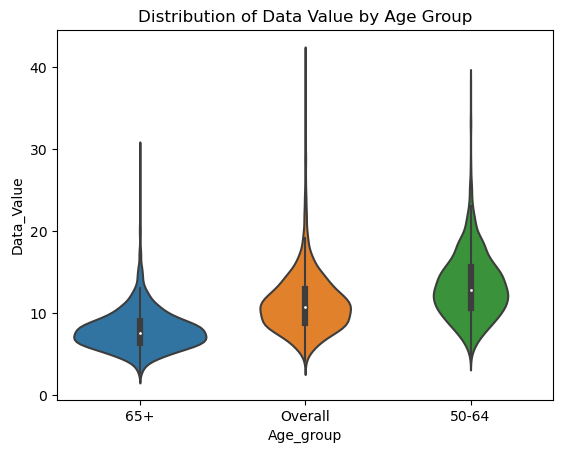

In [31]:
sns.violinplot(x='Age_group', y='Data_Value', data=mental_df)
plt.title('Distribution of Data Value by Age Group')
plt.show()


In [32]:
women_df = data[
    (data["State"] == "California") &
    (data["YearStart"] == 2019) &
    (data["YearEnd"] == 2019) &
    (data["Age_group"] == "50-64") &
    (data["Stratification2"] == "Female")
]

In [33]:
women_df

YearStart  YearEnd       State                                Class  \
51626       2019     2019  California                       Overall Health   
52401       2019     2019  California              Screenings and Vaccines   
53211       2019     2019  California  Nutrition/Physical Activity/Obesity   
53543       2019     2019  California  Nutrition/Physical Activity/Obesity   
54051       2019     2019  California              Screenings and Vaccines   
54326       2019     2019  California  Nutrition/Physical Activity/Obesity   
54718       2019     2019  California                       Overall Health   
55428       2019     2019  California                        Mental Health   
56205       2019     2019  California                       Overall Health   
56521       2019     2019  California  Nutrition/Physical Activity/Obesity   
56720       2019     2019  California                        Mental Health   
57022       2019     2019  California              Smoking and Alcohol Use   
57501       2019     2019  California                       Overall Health   
58195       2019     2019  California                       Overall Health   
58843       2019     2019  California              Screenings and Vaccines   
59336       2019     2019  California                       Overall Health   
59673       2019     2019  California                       Overall Health   
60115       2019     2019  California                       Overall Health   
60621       2019     2019  California              Screenings and Vaccines   
61084       2019     2019  California              Smoking and Alcohol Use   
61813       2019     2019  California                       Overall Health   

                                                   Topic  \
51626  Disability status, including sensory or mobili...   
52401                Cholesterol checked in past 5 years   
53211                                            Obesity   
53543                      Eating 2 or more fruits daily   
54051                      Ever had pneumococcal vaccine   
54326                  Eating 3 or more vegetables daily   
54718    Physically unhealthy days (mean number of days)   
55428                           Frequent mental distress   
56205          Taking medication for high blood pressure   
56521  No leisure-time physical activity within past ...   
56720                   Lifetime diagnosis of depression   
57022                                    Current smoking   
57501                       Arthritis among older adults   
58195          Recent activity limitations in past month   
58843                           High blood pressure ever   
59336  Fair or poor health among older adults with ar...   
59673            Self-rated health (fair to poor health)   
60115  Severe joint pain among older adults with arth...   
60621                 Influenza vaccine within past year   
61084                 Binge drinking within past 30 days   
61813       Self-rated health (good to excellent health)   

                                                Question Data_Value_Type  \
51626  Percentage of older adults who report having a...      Percentage   
52401  Percentage of older adults who had a cholester...      Percentage   
53211  Percentage of older adults who are currently o...      Percentage   
53543  Percentage of older adults who are eating 2 or...      Percentage   
54051  Percentage of at risk adults (have diabetes, a...      Percentage   
54326  Percentage of older adults who are eating 3 or...      Percentage   
54718  Physically unhealthy days (mean number of days...            Mean   
55428  Percentage of older adults who are experiencin...      Percentage   
56205  Percentage of older adults who have been told ...      Percentage   
56521  Percentage of older adults who have not had an...      Percentage   
56720  Percentage of older adults with a lifetime dia...      Percentage   
57022  Percentage of older adults who have smoked at ... 

In [34]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 51626 to 61813
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  21 non-null     int64  
 1   YearEnd                    21 non-null     int64  
 2   State                      21 non-null     object 
 3   Class                      21 non-null     object 
 4   Topic                      21 non-null     object 
 5   Question                   21 non-null     object 
 6   Data_Value_Type            21 non-null     object 
 7   Data_Value                 21 non-null     float64
 8   Low_Confidence_Limit       21 non-null     float64
 9   High_Confidence_Limit      21 non-null     float64
 10  Age_group                  21 non-null     object 
 11  Stratification2            21 non-null     object 
 12  StratificationCategoryID2  21 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usa

In [35]:
women_df['Topic'].unique()

array(['Disability status, including sensory or mobility limitations',
       'Cholesterol checked in past 5 years', 'Obesity',
       'Eating 2 or more fruits daily', 'Ever had pneumococcal vaccine',
       'Eating 3 or more vegetables daily',
       'Physically unhealthy days (mean number of days)',
       'Frequent mental distress',
       'Taking medication for high blood pressure',
       'No leisure-time physical activity within past month',
       'Lifetime diagnosis of depression', 'Current smoking',
       'Arthritis among older adults',
       'Recent activity limitations in past month',
       'High blood pressure ever',
       'Fair or poor health among older adults with arthritis',
       'Self-rated health (fair to poor health)',
       'Severe joint pain among older adults with arthritis',
       'Influenza vaccine within past year',
       'Binge drinking within past 30 days',
       'Self-rated health (good to excellent health)'], dtype=object)

In [36]:
men_df = data[
    (data["State"] == "California") &
    (data["YearStart"] == 2019) &
    (data["YearEnd"] == 2019) &
    (data["Age_group"] == "50-64") &
    (data["Stratification2"] == "Male")
]

In [37]:
men_df

YearStart  YearEnd       State                                Class  \
50914       2019     2019  California  Nutrition/Physical Activity/Obesity   
50945       2019     2019  California                       Overall Health   
52064       2019     2019  California  Nutrition/Physical Activity/Obesity   
52130       2019     2019  California                       Overall Health   
52776       2019     2019  California              Screenings and Vaccines   
53157       2019     2019  California                       Overall Health   
53325       2019     2019  California              Screenings and Vaccines   
53341       2019     2019  California                        Mental Health   
55825       2019     2019  California  Nutrition/Physical Activity/Obesity   
56573       2019     2019  California                       Overall Health   
57870       2019     2019  California              Smoking and Alcohol Use   
59089       2019     2019  California  Nutrition/Physical Activity/Obesity   
59101       2019     2019  California                       Overall Health   
59971       2019     2019  California              Screenings and Vaccines   
60598       2019     2019  California                       Overall Health   
60789       2019     2019  California              Screenings and Vaccines   
61310       2019     2019  California                       Overall Health   
61439       2019     2019  California              Smoking and Alcohol Use   
61820       2019     2019  California                       Overall Health   
61946       2019     2019  California                       Overall Health   
62350       2019     2019  California                        Mental Health   

                                                   Topic  \
50914                  Eating 3 or more vegetables daily   
50945    Physically unhealthy days (mean number of days)   
52064                      Eating 2 or more fruits daily   
52130          Taking medication for high blood pressure   
52776                      Ever had pneumococcal vaccine   
53157  Disability status, including sensory or mobili...   
53325                Cholesterol checked in past 5 years   
53341                           Frequent mental distress   
55825                                            Obesity   
56573       Self-rated health (good to excellent health)   
57870                 Binge drinking within past 30 days   
59089  No leisure-time physical activity within past ...   
59101  Fair or poor health among older adults with ar...   
59971                           High blood pressure ever   
60598          Recent activity limitations in past month   
60789                 Influenza vaccine within past year   
61310                       Arthritis among older adults   
61439                                    Current smoking   
61820            Self-rated health (fair to poor health)   
61946  Severe joint pain among older adults with arth...   
62350                   Lifetime diagnosis of depression   

                                                Question Data_Value_Type  \
50914  Percentage of older adults who are eating 3 or...      Percentage   
50945  Physically unhealthy days (mean number of days...            Mean   
52064  Percentage of older adults who are eating 2 or...      Percentage   
52130  Percentage of older adults who have been told ...      Percentage   
52776  Percentage of at risk adults (have diabetes, a...      Percentage   
53157  Percentage of older adults who report having a...      Percentage   
53325  Percentage of older adults who had a cholester...      Percentage   
53341  Percentage of older adults who are experiencin...      Percentage   
55825  Percentage of older adults who are currently o...      Percentage   
56573  Percentage of older adults who self-reported t...      Percentage   
57870  Percentage of older adults who reported binge ...      Percentage   
59089  Percentage of older adults who have not had an... 

In [38]:
mental_df.head()

YearStart  YearEnd          State  Data_Value  Low_Confidence_Limit  \
0       2022     2022       Maryland         9.0                   6.5   
1       2022     2022      Wisconsin         5.6                   4.4   
2       2022     2022       Oklahoma        21.5                  15.4   
3       2022     2022   Pennsylvania        10.0                   8.3   
4       2016     2016  New Hampshire        10.4                   8.6   

   High_Confidence_Limit Age_group           Stratification2  \
0                   12.3       65+       Black, non-Hispanic   
1                    7.2       65+                      Male   
2                   29.2   Overall  Native Am/Alaskan Native   
3                   12.1   Overall       White, non-Hispanic   
4                   12.6     50-64                    Female   

  StratificationCategoryID2  
0                      RACE  
1                    GENDER  
2                      RACE  
3                      RACE  
4                    GENDER

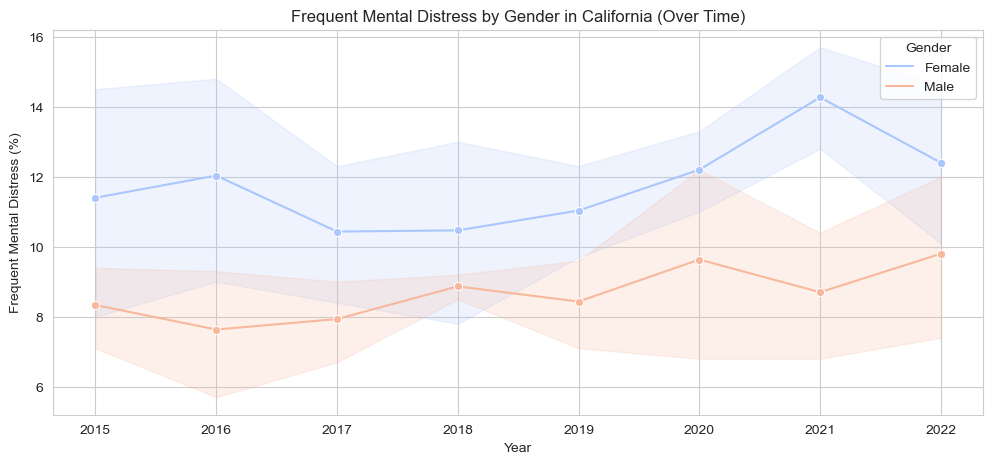

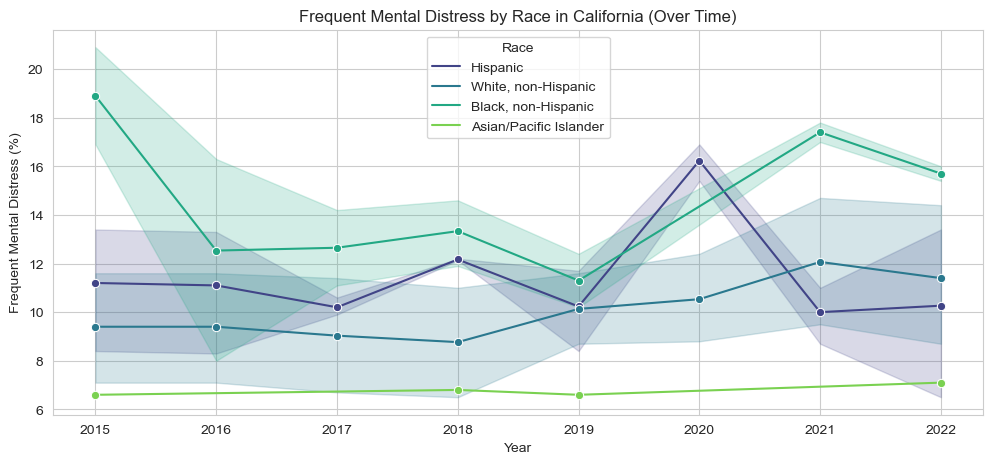

In [39]:
# Filter for California
california_df = mental_df[mental_df["State"] == "California"]

# Split gender and race data
gender_df = california_df[california_df["StratificationCategoryID2"] == "GENDER"]
race_df = california_df[california_df["StratificationCategoryID2"] == "RACE"]

# Set plot style
sns.set_style("whitegrid")

# Plot gender trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=gender_df, x="YearStart", y="Data_Value", hue="Stratification2", marker="o", palette="coolwarm")
plt.title("Frequent Mental Distress by Gender in California (Over Time)")
plt.xlabel("Year")
plt.ylabel("Frequent Mental Distress (%)")
plt.legend(title="Gender")
plt.show()

# Plot race trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=race_df, x="YearStart", y="Data_Value", hue="Stratification2", marker="o", palette="viridis")
plt.title("Frequent Mental Distress by Race in California (Over Time)")
plt.xlabel("Year")
plt.ylabel("Frequent Mental Distress (%)")
plt.legend(title="Race")
plt.show()


In [40]:
import plotly.express as px
import plotly.graph_objects as go

# Load state abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert state names to abbreviations
mental_df['State'] = mental_df['State'].map(state_abbreviations)

# Filter the data for YearStart = 2019, Stratification2 = 'Female', and Age_group = '65+'
filtered_data = mental_df[
    (mental_df['YearStart'] == 2019) & 
    (mental_df['Stratification2'] == 'Female') & 
    (mental_df['Age_group'] == '65+')
].dropna(subset=['State'])

# Check if filtered_data is empty
if filtered_data.empty:
    print("No data available for the selected filters.")
else:
    # Create choropleth
    fig = px.choropleth(
        filtered_data,
        locations='State',
        locationmode='USA-states',
        color='Data_Value',
        hover_name='State',
        hover_data=['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit'],
        scope='usa',
        color_continuous_scale='Viridis',
        title='Mental Health Metrics for Females Aged 65+ in 2019'
    )

    # Add state abbreviations as text
    for i, row in filtered_data.iterrows():
        fig.add_trace(go.Scattergeo(
            locationmode='USA-states',
            locations=[row['State']],
            text=row['State'],  # Abbreviation
            mode='text',
            showlegend=False
        ))

    # Update layout
    fig.update_layout(
        title_font_size=20,
        title_x=0.5,
        geo=dict(
            lakecolor='rgb(255, 255, 255)',
            landcolor='rgb(217, 217, 217)'
        )
    )

    # Show the map
    fig.show()


Mean Frequent Mental Distress by Age Group:
 Age_group
50-64      13.327853
Overall    11.280865
65+         7.998797
Name: Data_Value, dtype: float64


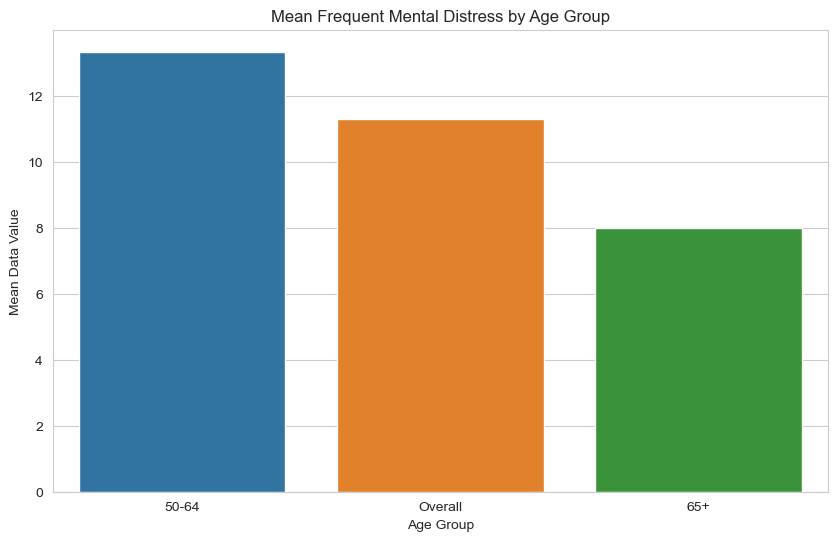

In [41]:
# 1. Identify Demographic Groups Most Affected by Frequent Mental Distress:

# Age Groups
age_group_means = mental_df.groupby('Age_group')['Data_Value'].mean().sort_values(ascending=False)
print("Mean Frequent Mental Distress by Age Group:\n", age_group_means)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_means.index, y=age_group_means.values)
plt.title("Mean Frequent Mental Distress by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Data Value")
plt.show()


Mean Frequent Mental Distress by Race:
 Stratification2
Native Am/Alaskan Native    18.719286
Hispanic                    13.244022
Black, non-Hispanic         12.959014
White, non-Hispanic          9.983005
Asian/Pacific Islander       6.991429
Name: Data_Value, dtype: float64


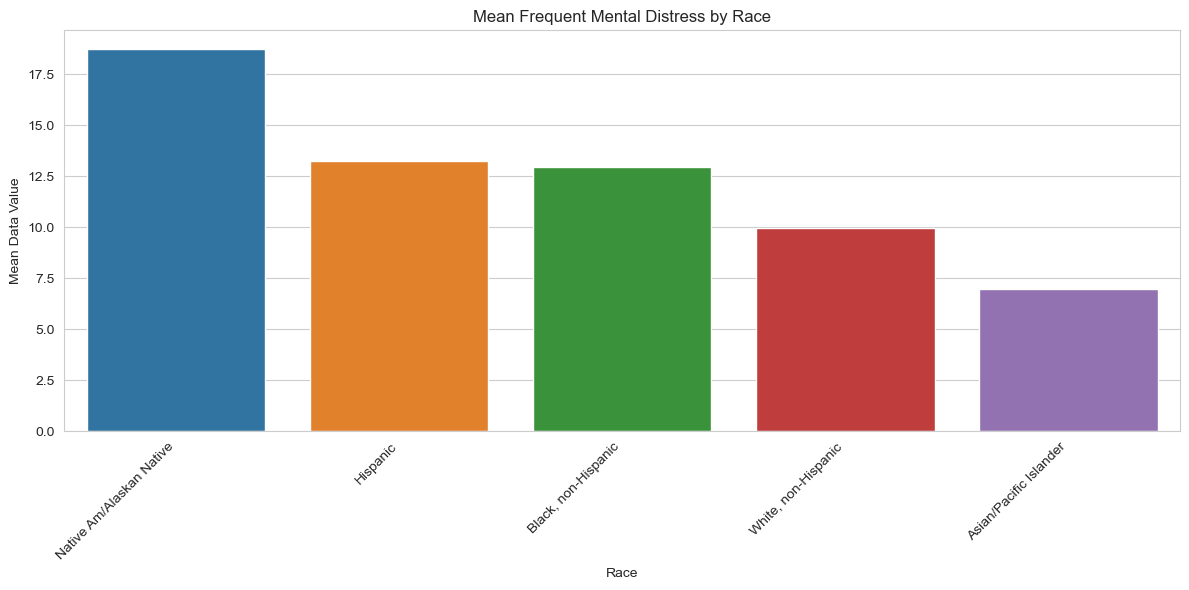

In [42]:
# Filter data for Race
race_df = mental_df[mental_df['StratificationCategoryID2'] == 'RACE']

# Race
race_means = race_df.groupby('Stratification2')['Data_Value'].mean().sort_values(ascending=False)
print("\nMean Frequent Mental Distress by Race:\n", race_means)

plt.figure(figsize=(12, 6))
sns.barplot(x=race_means.index, y=race_means.values)
plt.title("Mean Frequent Mental Distress by Race")
plt.xlabel("Race")
plt.ylabel("Mean Data Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Frequent Mental Distress by Gender:
 Stratification2
Female    12.114532
Male       8.526094
Name: Data_Value, dtype: float64


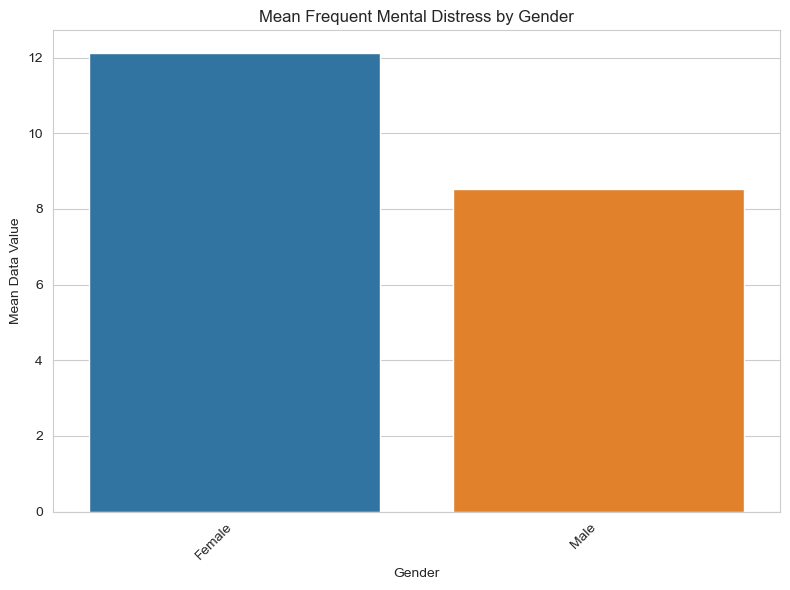

In [43]:
gender_df = mental_df[mental_df['StratificationCategoryID2'] == 'GENDER']
# Gender
gender_means = gender_df.groupby('Stratification2')['Data_Value'].mean().sort_values(ascending=False)  # Assuming gender is in Stratification2
print("\nMean Frequent Mental Distress by Gender:\n", gender_means)

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_means.index, y=gender_means.values)
plt.title("Mean Frequent Mental Distress by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Data Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Frequent Mental Distress by State:
 State
WV    15.518182
OK    14.592523
AR    14.031579
LA    13.616495
KY    13.513580
AL    12.940625
TN    12.913636
MS    12.509375
NM    12.475000
MI    12.398020
SC    12.046392
FL    12.034343
OH    11.916495
NV    11.908434
NC    11.807000
IN    11.656701
MO    11.615957
WA    11.570642
AZ    11.522807
MT    11.481111
RI    11.472727
OR    11.349367
TX    11.090991
MA    11.023158
CA    10.989831
GA    10.960204
NY    10.925397
NJ    10.842857
KS    10.810185
PA    10.605618
ME    10.372973
CT    10.101905
VT    10.023288
IL     9.877551
DE     9.728736
MN     9.725234
UT     9.697647
VA     9.680000
CO     9.628846
WI     9.535897
WY     9.529730
AK     9.470238
MD     9.436893
ID     9.436842
NH     9.050000
HI     8.955357
NE     8.838824
IA     8.466234
SD     7.653247
ND     7.518182
Name: Data_Value, dtype: float64


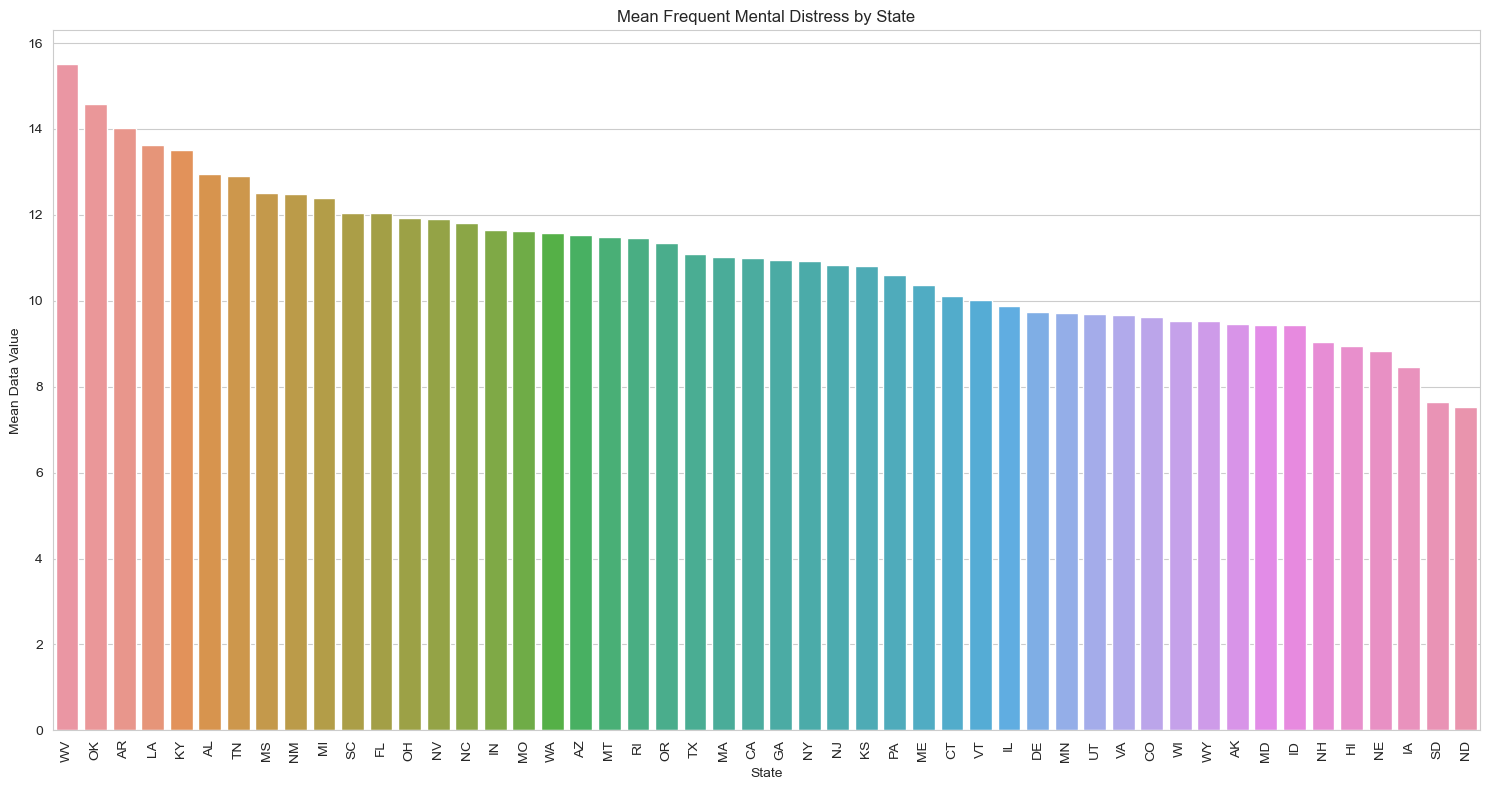

In [44]:
# 2. Explore Geographic Variations in Mental Distress Percentages:

# State-Level Analysis
state_means = mental_df.groupby('State')['Data_Value'].mean().sort_values(ascending=False)
print("\nMean Frequent Mental Distress by State:\n", state_means)

plt.figure(figsize=(15, 8))
sns.barplot(x=state_means.index, y=state_means.values)
plt.title("Mean Frequent Mental Distress by State")
plt.xlabel("State")
plt.ylabel("Mean Data Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
# Filter data for 'Frequent mental distress'
mental_distress_df = df[df['Topic'] == 'Frequent mental distress']


Correlation between Mental Distress and Activity Limitations: 0.5318801851399373


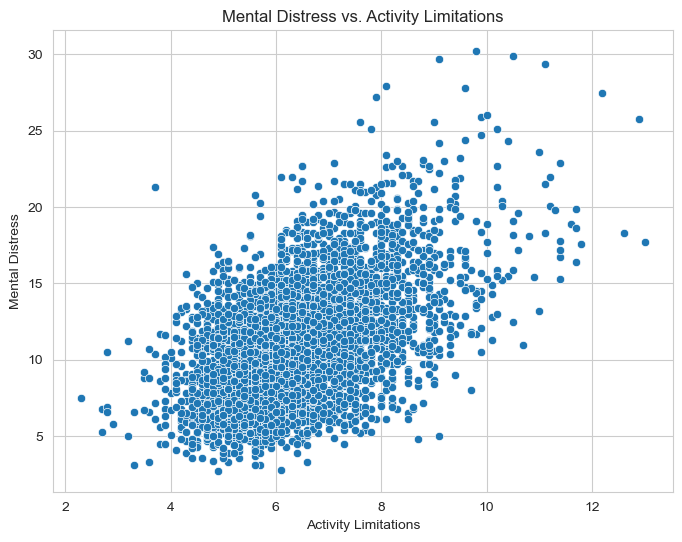


Correlation between Mental Distress and Good Self-Rated Health: -0.42256059193924317
Correlation between Mental Distress and Poor Self-Rated Health: 0.42423774951057447


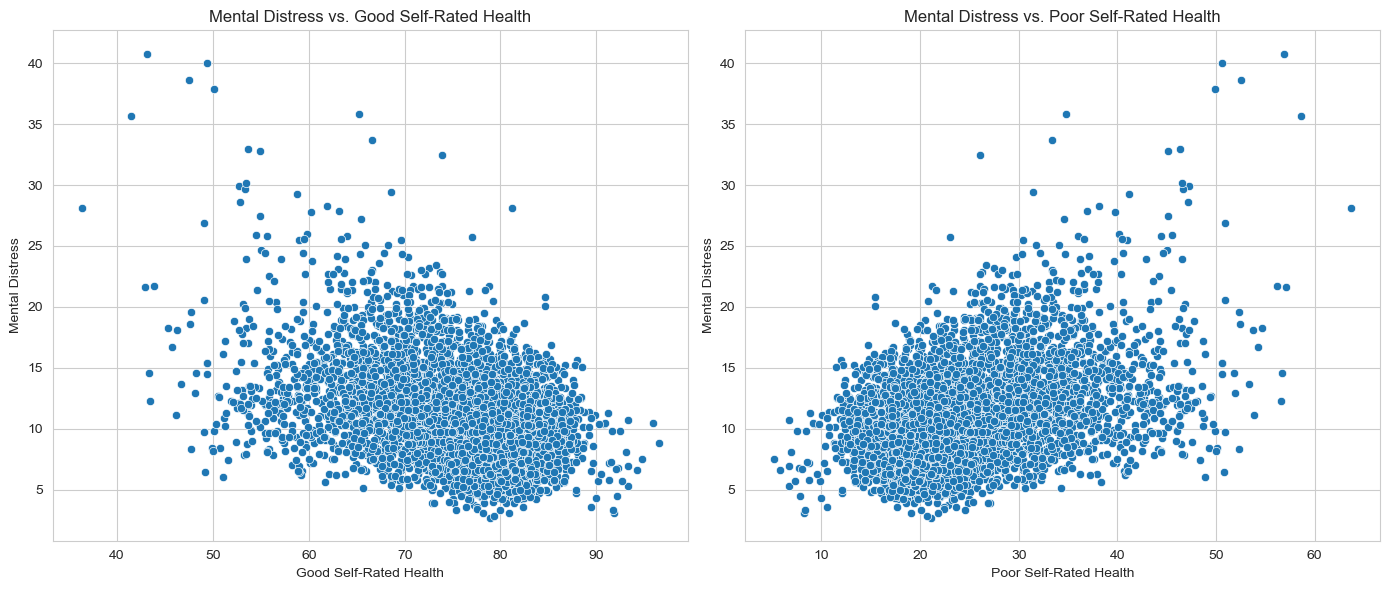


Correlation between Mental Distress and Disability: 0.19367813592388097


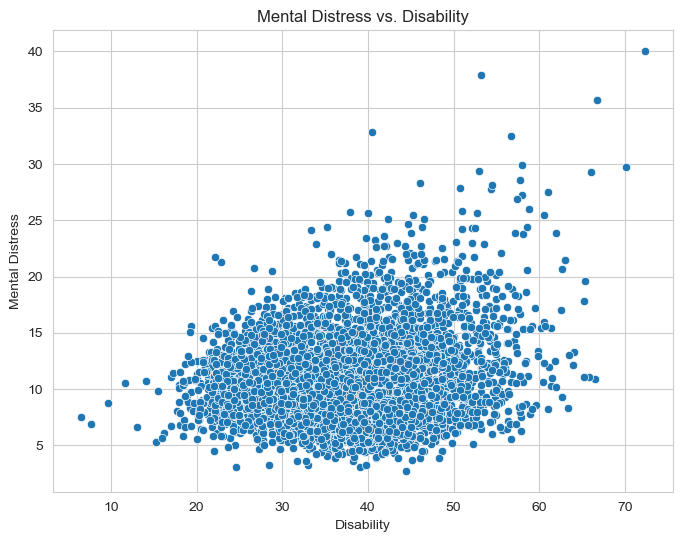

In [47]:
# 3. Analyze Correlations Between Mental Distress and Other Health Indicators:

# Physical Activity Limitations
activity_limitations_df = df[df['Topic'] == 'Recent activity limitations in past month']
merged_activity = pd.merge(mental_distress_df, activity_limitations_df, on=['YearStart', 'YearEnd', 'State', 'Age_group', 'Stratification2'], suffixes=('_mental', '_activity'), how='inner')
correlation_activity = merged_activity['Data_Value_mental'].corr(merged_activity['Data_Value_activity'])
print(f"\nCorrelation between Mental Distress and Activity Limitations: {correlation_activity}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Data_Value_activity', y='Data_Value_mental', data=merged_activity)
plt.title("Mental Distress vs. Activity Limitations")
plt.xlabel("Activity Limitations")
plt.ylabel("Mental Distress")
plt.show()

# Self-Rated Health
self_rated_good_df = df[df['Topic'] == 'Self-rated health (good to excellent health)']
self_rated_poor_df = df[df['Topic'] == 'Self-rated health (fair to poor health)']

merged_good_health = pd.merge(mental_distress_df, self_rated_good_df, on=['YearStart', 'YearEnd', 'State', 'Age_group', 'Stratification2'], suffixes=('_mental', '_good'), how='inner')
merged_poor_health = pd.merge(mental_distress_df, self_rated_poor_df, on=['YearStart', 'YearEnd', 'State', 'Age_group', 'Stratification2'], suffixes=('_mental', '_poor'), how='inner')

correlation_good_health = merged_good_health['Data_Value_mental'].corr(merged_good_health['Data_Value_good'])
correlation_poor_health = merged_poor_health['Data_Value_mental'].corr(merged_poor_health['Data_Value_poor'])

print(f"\nCorrelation between Mental Distress and Good Self-Rated Health: {correlation_good_health}")
print(f"Correlation between Mental Distress and Poor Self-Rated Health: {correlation_poor_health}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Data_Value_good', y='Data_Value_mental', data=merged_good_health)
plt.title("Mental Distress vs. Good Self-Rated Health")
plt.xlabel("Good Self-Rated Health")
plt.ylabel("Mental Distress")

plt.subplot(1, 2, 2)
sns.scatterplot(x='Data_Value_poor', y='Data_Value_mental', data=merged_poor_health)
plt.title("Mental Distress vs. Poor Self-Rated Health")
plt.xlabel("Poor Self-Rated Health")
plt.ylabel("Mental Distress")

plt.tight_layout()
plt.show()

#Other Health Factors (Example with Disability Status)
disability_df = df[df['Topic'] == 'Disability status, including sensory or mobility limitations']
merged_disability = pd.merge(mental_distress_df, disability_df, on=['YearStart', 'YearEnd', 'State', 'Age_group', 'Stratification2'], suffixes=('_mental', '_disability'), how='inner')
correlation_disability = merged_disability['Data_Value_mental'].corr(merged_disability['Data_Value_disability'])
print(f"\nCorrelation between Mental Distress and Disability: {correlation_disability}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Data_Value_disability', y='Data_Value_mental', data=merged_disability)
plt.title("Mental Distress vs. Disability")
plt.xlabel("Disability")
plt.ylabel("Mental Distress")
plt.show()